<a href="https://colab.research.google.com/github/VitalyChait/LorentzSystemVisualization/blob/master/Colab_Lorentz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lorenz System


## Exploring the Lorenz System of Differential Equations

The Lorenz system is a system of ordinary differential equations first studied by mathematician and meteorologist Edward Lorenz. <br>
It is notable for having chaotic solutions for certain parameter values and initial conditions, also known as a "Butterfly effect". <br>
The differential equations are:

$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy 
\end{aligned}
$

This is one of the classic systems in non-linear differential equations. <br>It exhibits a range of different behaviors as the parameters ($\sigma$, $\beta$, $\rho$) are varied. <br>
Below there is an interactive visual implementation of the system's output, as we change the input parameters. 

![Lorenz](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif "lorenz")



## Implementation

### Imports

First, we import the needed things from IPython, [NumPy](http://www.numpy.org/), [Matplotlib](http://matplotlib.org/index.html) and [SciPy](http://www.scipy.org/).

In [13]:
%matplotlib inline

In [14]:
from ipywidgets import interact, interactive, widgets
from IPython.display import clear_output, display, HTML

In [15]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

### Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions.<br> This function has arguments that control: <br><br>The parameters of the differential equation ($\sigma$, $\beta$, $\rho$) <br>The numerical integration (`N`, `length`)<br>The initial source position(`sLRange`)<br>The visualization (`yaw`, `roll`, `zoomOut`, `xShift`, `yShift`, `zShift`, `showAxis`).

In [16]:
def lorenz(σ=10.0, β=8./3, ϱ=28.0, N=10, sLRange = 15, length=4.0, yaw=90., roll=0, zoomOut=1., xShift=0, yShift=0, zShift=0, showAxis="off"):

    # System, as shown above
    def lorenz_activate(x_y_z, t0, sigma=σ, beta=β, rho=ϱ):
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
    
    
    # Axes init and configurable limits
    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');
    ax.axis(showAxis)

    ax.set_xlim((int(-25*zoomOut)+xShift, int(25*zoomOut)+xShift))
    ax.set_ylim((int(-35*zoomOut)+yShift, int(35*zoomOut)+yShift))
    ax.set_zlim((int(5*zoomOut)+zShift, int(55*zoomOut)+zShift))

    colors = plt.cm.jet(np.linspace(0, 1, N));

    

    # Random starting point distributed from -startLimitRange to startLimitRange [sLRange]
    np.random.seed(47)
    x0 = -(sLRange) + 2*(sLRange)* np.random.random((N, 3))
    

    # Trajectories
    t = np.linspace(0, length, int(300*length))
    x_t = np.asarray([integrate.odeint(lorenz_activate, x0i, t)
                      for x0i in x0])
    
    
    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        _ = plt.setp(lines, linewidth=2);

    ax.view_init(roll, yaw)
    _ = plt.show();

    return t, x_t

### Interactive Widget

Try to play with the trajectories behavior as you change the various parameters 😀

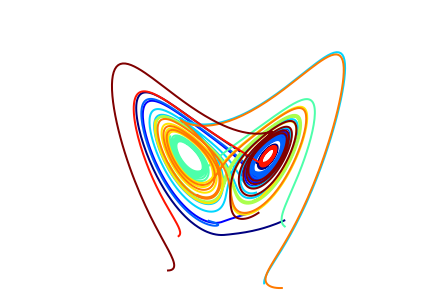

In [17]:
display(_ = lorenz()); # Default

In [18]:
dynamic_widget = interactive(lorenz, σ=(0.,100.), β=(0., 100.), ϱ=(0.,100.), 
                             N=(1,50), sLRange=(0.1, 100), length=(0.1, 10., 0.01), 
                             yaw=(0.,360.), roll=(0., 360.), zoomOut=(0.1, 10), 
                             xShift=(-100, 100), yShift=(-100, 100), zShift=(-100, 100), 
                             showAxis=["off", "on"])
display(dynamic_widget);

interactive(children=(FloatSlider(value=10.0, description='σ'), FloatSlider(value=2.6666666666666665, descript…

## Examples

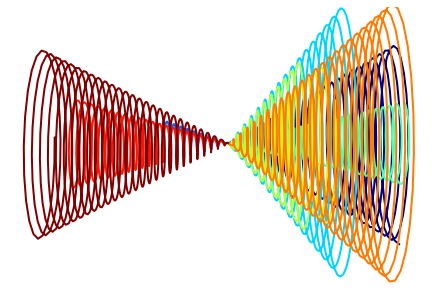

In [19]:
display(_ = lorenz(σ=.5, β=0, ϱ=28, N=10, sLRange=100, length=10, yaw=90, roll=94, zoomOut=2.1))

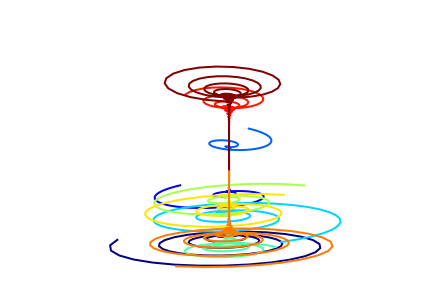

In [20]:
display(_ = lorenz(σ=.5, β=11.6, ϱ=0, N=10, sLRange=100, length=10, yaw=180, roll=75, zoomOut=2.8))

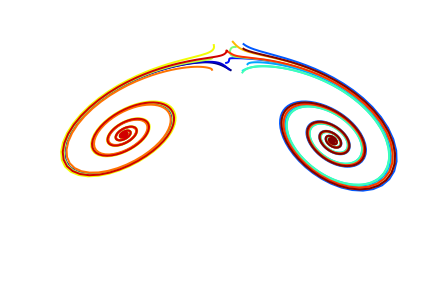

In [21]:
display(_ = lorenz(σ=56.4, β=25.1, ϱ=54.9, N=15, sLRange=10.5, length=2.85, yaw=135, roll=165, zoomOut=2))

## Reference:
https://en.wikipedia.org/wiki/Lorenz_system <br>
https://en.wikipedia.org/wiki/Edward_Norton_Lorenz <br>
https://en.wikipedia.org/wiki/Butterfly_effect <br>
https://en.wikipedia.org/wiki/Attractor